In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

img_path = "../images/earth.bmp"
# img_path = "../images/cameraman.tif"

In [3]:
p = np.array(pow(2,4))
print(np.binary_repr(np.invert(p),8))

11101111


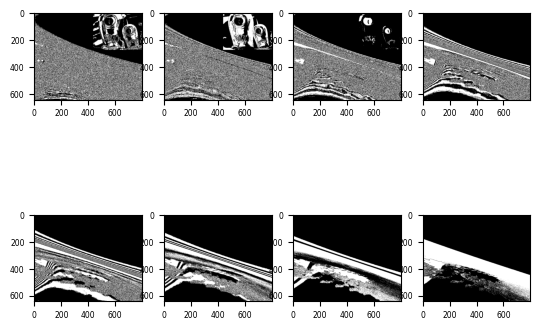

In [4]:
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

def descartar_bitplane(img,plane):
    return np.left_shift(np.right_shift(img,plane),plane)

def obtener_bitplane(img,plane_number):
    ''' 
    Funcion que devuelve el plano de bits de la imagen de entrada
    img: imagen de entrada - numpy.ndarray
    plane_number: plano de bits deseado (1 a 8) - integer
    '''
    mask = np.array(pow(2,plane_number-1))
    # print("First Value: " + np.binary_repr(img[0,0],8))
    # print("Mask: " + np.binary_repr(mask,8))
    # print("Bitwise and: " + np.binary_repr(np.bitwise_and(img[0,0],mask),8))
    return np.bitwise_and(img,np.ones_like(img)*mask)

img_mod = descartar_bitplane(img,4)

img_plano = obtener_bitplane(img,1)

plt.figure()
plt.rcParams.update({'font.size': 5.5})
for i in range(1,9):
    plt.subplot(2,4,i)
    plt.imshow(obtener_bitplane(img,i),cmap="gray")
# plt.imshow(obtener_bitplane(img,2),cmap="gray")

plt.show()

(640, 800)


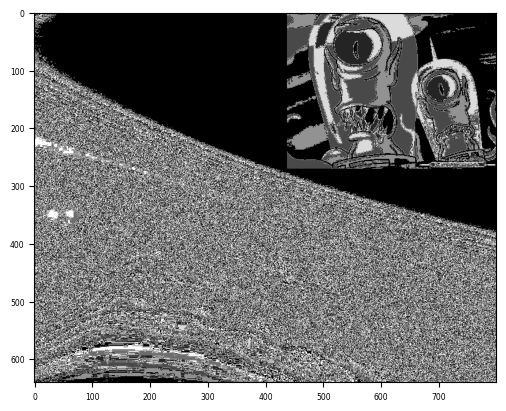

In [5]:
img_bin = []
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        img_bin.append(np.binary_repr(img[y,x],width=8))

bit_planes = np.empty((8,img.shape[0],img.shape[1]))
# arr = (np.array([int(plane[1]) for plane in img_bin],dtype=np.uint8)*pow(2,1)).reshape(img.shape[0],img.shape[1])
for i in range(8):
    bit_planes[i,:,:] = (np.array([int(plane[7-i]) for plane in img_bin],dtype=np.uint8)*pow(2,7-i)).reshape(img.shape[0],img.shape[1])
    
print(sum(bit_planes[0:3]).shape)
plt.imshow(sum(bit_planes[0:3]),cmap='gray')

32.0


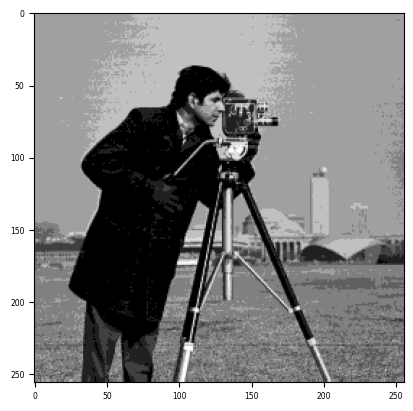

In [6]:
def quantize_image(image, levels):
    max_value = np.max(image)
    min_value = np.min(image)
    range_ = max_value - min_value
    step = 256 / levels
    print(step)
    quantized_image = np.round((image) / step)
    return quantized_image.astype(np.uint8)

img_path = "../images/cameraman.tif"
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

img_q = quantize_image(img,8)
fig,ax = plt.subplots()
ax.imshow(img_q,cmap='gray')